<a href="https://colab.research.google.com/github/Ratatoi/Trackify/blob/master/Single_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
path=pathlib.Path(base_dir+'Hospital/bed_classif')

In [0]:
data = ImageDataBunch.from_folder(path,valid_pct=0.2,ds_tfms=get_transforms(),size=224,bs=64).normalize(imagenet_stats)

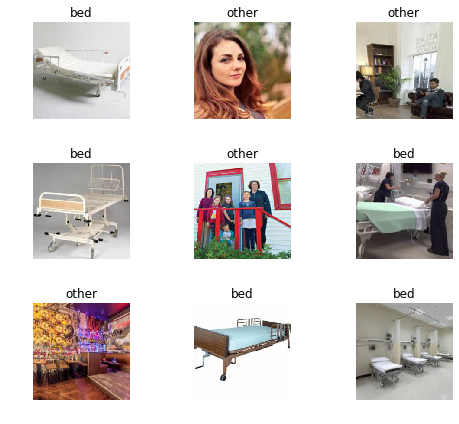

In [0]:
data.show_batch(rows=3, figsize=(7,6))

In [0]:
print(data.classes)
len(data.classes),data.c

['bed', 'other']


(2, 2)

In [0]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:06<00:00, 12944242.27it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.465930,0.146993,0.056034,02:40
1,0.308465,0.140760,0.056034,00:15
2,0.234232,0.128590,0.047414,00:11
3,0.193000,0.123887,0.047414,00:11


In [0]:
learn.save('bed_classif_pre')

In [0]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idxs=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

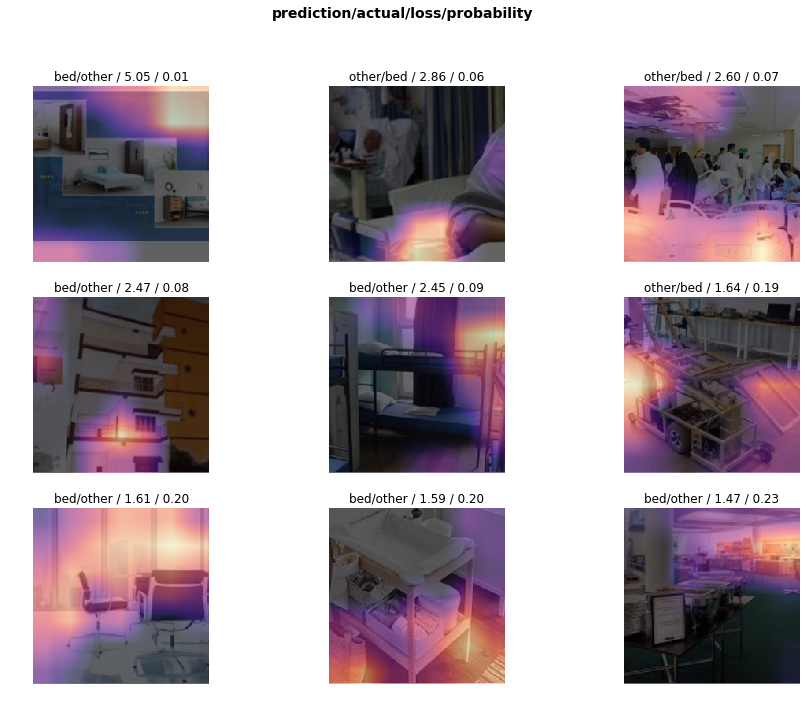

In [0]:
interp.plot_top_losses(9,figsize=(15,11))

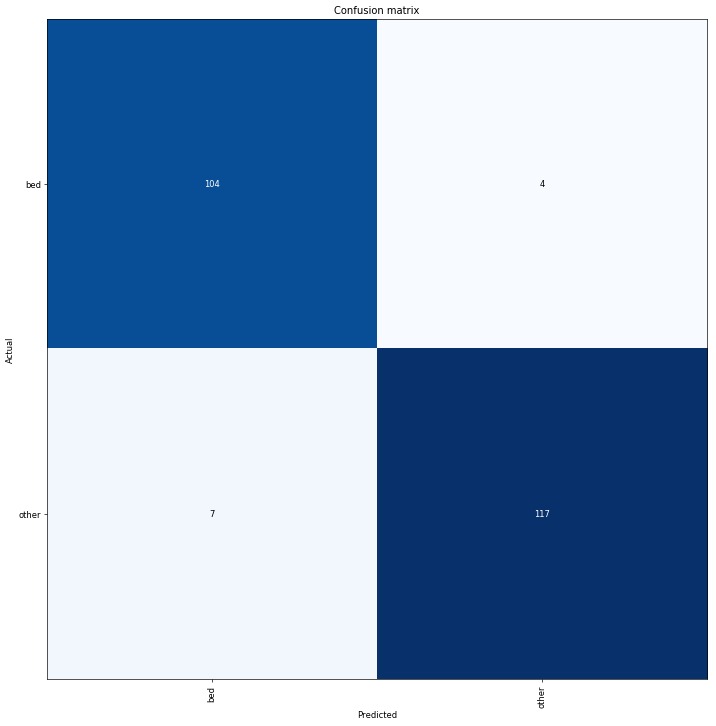

In [0]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [0]:
interp.most_confused(min_val=1)

[('other', 'bed', 7), ('bed', 'other', 4)]

In [0]:
len(data.valid_ds)

232

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(1)

In [0]:
learn.load('Superhero_mod_pre_gpu')

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


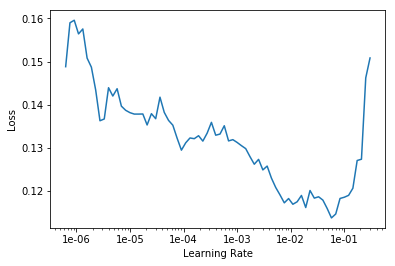

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(5,max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.080239,0.102608,0.043103,00:11
1,0.076793,0.102764,0.038793,00:11
2,0.063443,0.089794,0.038793,00:11
3,0.053138,0.082393,0.038793,00:11
4,0.050912,0.083908,0.038793,00:12


In [0]:
learn.save('bed_classif_lr')

In [0]:
learn.load('bed_classif_lr')

Learner(data=ImageDataBunch;

Train: LabelList (932 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bed,bed,bed,bed,bed
Path: /content/gdrive/My Drive/fastai-v3/Hospital/bed_classif;

Valid: LabelList (232 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
bed,other,bed,other,other
Path: /content/gdrive/My Drive/fastai-v3/Hospital/bed_classif;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (b

In [0]:
img=learn.data.train_ds[0][0]
learn.predict(img)

(Category bed, tensor(0), tensor([1.0000e+00, 1.9728e-07]))

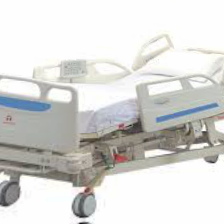

In [0]:
learn.export()

In [0]:
learn = load_learner(path)

In [0]:
fnames = get_image_files(path/'test_single')
tags = []
for i in fnames:
  img = open_image(i)
  out = learn.predict(img)
  tags.append(str(out[0]))#append modifies list in place and returns none
image_name = ['train_'+str(i) for i in range(len(tags))]

In [0]:
# pred_dict = {'image_name':['train_0'],'tags':[str(out[0])]}# Put single item scalar values in a list
pred_dict = {'image_name':image_name,'tags':tags}
df = pd.DataFrame(pred_dict)
print(df)

  image_name   tags
0    train_0    bed
1    train_1  other


In [0]:
df.to_csv(path/'test2.csv')